### 1. 데이터셋 준비하기

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
signal_data = np.cos(np.arange(1600) * (20*np.pi / 1000))[:, None]

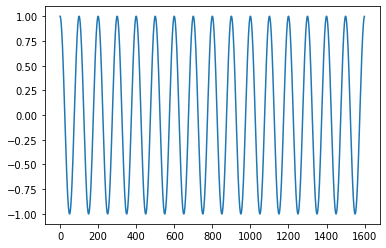

In [5]:
# 데이터 확인하기

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [9]:
# signal_data로 데이터셋을 만들어주는 함수만들기

def create_dataset(signal_data, look_back=1): # look_back : X를 몇 개의 이전수치
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# signal_data 전처리

scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

In [11]:
# 데이터 분리

train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

In [22]:
# 데이터 셋 생성
look_back = 40

X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

### 2. 레이어 준비
- LSTM
- tanh

### 3. 모델 준비

#### 1) 다층퍼셉트론 신경망

In [56]:
from tensorflow import keras

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [24]:
# 데이터셋 전처리
# 순환신경망 모델을 위해 축을 하나 더 만들어준 다음, 여기서는 축 빼줘야 해서
# np.squeeze 함수로 차원이 1인 축 제거

X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], x_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train = np.squeeze(X_train)
X_val = np.squeeze(X_val)
X_test = np.squeeze(X_test)

In [25]:
model = Sequential()
model.add(Dense(32, input_dim=40, activation='relu'))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1))

In [26]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [28]:
hist = model.fit(X_train, y_train, epochs=200, batch_size=32,
                 validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 8ms/step - loss: 0.3682 - val_loss: 0.1480
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2556 - val_loss: 0.0946
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2180 - val_loss: 0.0727
Epoch 4/200
24/24 [==============================] - 0s 10ms/step - loss: 0.1850 - val_loss: 0.0591
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1528 - val_loss: 0.0474
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1320 - val_loss: 0.0387
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1186 - val_loss: 0.0326
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1168 - val_loss: 0.0282
Epoch 9/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.0263
Epoch 10/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 0.0230
Epoch 11

24/24 [==============================] - 0s 2ms/step - loss: 0.0471 - val_loss: 0.0098
Epoch 84/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.0101
Epoch 85/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.0098
Epoch 86/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.0093
Epoch 87/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0425 - val_loss: 0.0090
Epoch 88/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.0083
Epoch 89/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.0082
Epoch 90/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.0082
Epoch 91/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.0085
Epoch 92/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.0087
Epoch 93/200


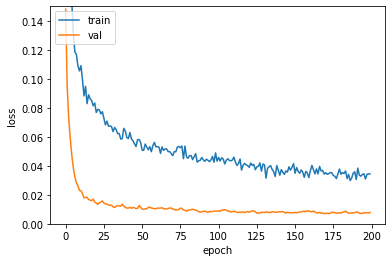

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
# 모델 평가하기
# train셋에서도 해주는 이유는 Dropout층이 훈련할 때는 dropout을 적용하지만,
# test 시에는 dropout을 안해주기 때문에 제대로 비교하기 위해서는 train도 evaluate 해줘야

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train score: ', train_score)
val_score = model.evaluate(X_val, y_val, verbose=0)
print('Validation score: ', val_score)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', test_score)

Train score:  0.008068667724728584
Validation score:  0.007840817794203758
Test score:  0.007840817794203758


In [35]:
X_test.shape

(360, 40)

In [41]:
# 모델 사용하기
# 예측한 값을 다시 X값으로 사용해서 예측하기

look_ahead = 250  # 250개 예측하겠다
xhat = X_test[0, None]   # 첫번째 행만 가져오기
predictions = np.zeros((look_ahead, 1))

for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:, 1:], prediction]) 
        # hstack : 가로 결합 
        # xhat의 (두번째~)와 prediction 가로 결합해서 다시 X값 만들어주기 

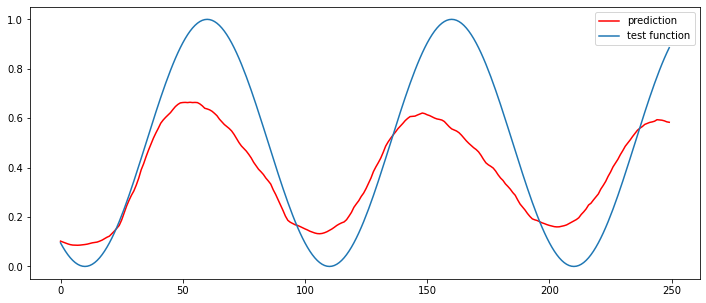

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

#### 2) 순환신경망 모델

In [43]:
X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], x_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
hist = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 1s 30ms/step - loss: 0.2861 - val_loss: 0.0548
Epoch 2/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0615 - val_loss: 0.0326
Epoch 3/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0427 - val_loss: 0.0214
Epoch 4/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0284 - val_loss: 0.0146
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0220 - val_loss: 0.0058
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0151 - val_loss: 0.0023
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0126 - val_loss: 0.0021
Epoch 8/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0115 - val_loss: 0.0016
Epoch 9/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0101 - val_loss: 0.0018
Epoch 10/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0020

24/24 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 2.6880e-05
Epoch 157/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 6.4511e-06
Epoch 158/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 1.8359e-04
Epoch 159/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 2.2865e-04
Epoch 160/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 1.8953e-05
Epoch 161/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 3.6315e-05
Epoch 162/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 2.7256e-04
Epoch 163/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 2.0483e-04
Epoch 164/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 1.3712e-04
Epoch 165/200
24/24 [==============================] - 0s 14

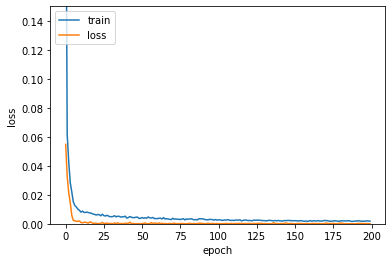

In [47]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [48]:
# 모델 평가하기

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train score: ', train_score)
val_score = model.evaluate(X_val, y_val, verbose=0)
print('Validation score: ', val_score)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', test_score)

Train score:  7.569319859612733e-05
Validation score:  7.86705277278088e-05
Test score:  7.86705277278088e-05


In [53]:
# 모델 사용하기

look_ahead = 250
xhat = X_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

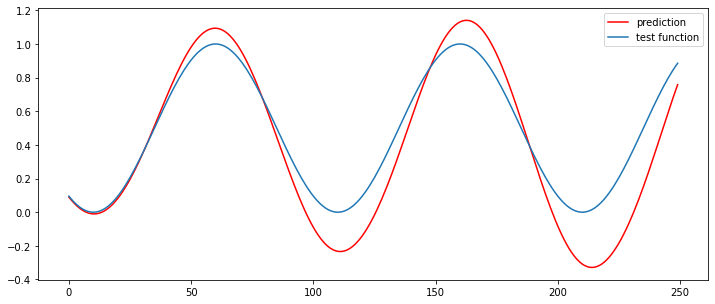

In [54]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

#### 3) 상태유지 순환신경망 모델
- 순환신경망 모델과 동일하나, stateful=True 옵션을 사용
- 만약, stateful=False를 하면 배치마다 메모리가 reset되지만, stateful=True를 하면 다음 배치에서도 메모리가 계속 유지

In [57]:
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [58]:
model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
                 # batch_input_shape=(batch size,time steps, dimension)
model.add(Dropout(0.3))
model.add(Dense(1))

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam')

custom_hist = CustomHistory()
custom_hist.init()

In [61]:
for i in range(200):
    model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle=False,
             callbacks=[custom_hist], validation_data=(X_val, y_val))
    model.reset_states()

760/760 [==============================] - 10s 13ms/step - loss: 0.0020 - val_loss: 9.2709e-05


760/760 [==============================] - 11s 15ms/step - loss: 0.0020 - val_loss: 6.4672e-05


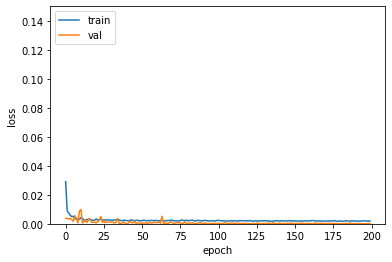

In [69]:
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
X_train.shape, y_train.shape

((760, 40, 1), (760,))

In [74]:
# 모델 평가하기

train_score = model.evaluate(X_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train score :', train_score)
val_score = model.evaluate(X_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validation score :', val_score)
test_score = model.evaluate(X_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test score :', test_score)

Train score : 6.333101191557944e-05
Validation score : 6.46831831545569e-05
Test score : 6.46831831545569e-05


In [78]:
# 모델 사용하기

look_ahead = 250
xhat = X_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

model.reset_states()

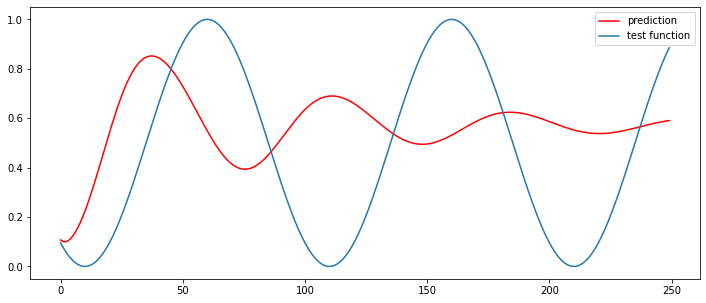

In [79]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

# 순환 신경망 모델보다 Bad

#### 4) 상태유지 스택 순환신경망 모델
- 상태유지 신경망을 여러겹으로 쌓아올린 모델
- 더 깊은 추론이 가능한 모델

In [80]:
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, 
             return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

In [81]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [82]:
custom_hist = CustomHistory()
custom_hist.init()

In [84]:
for i in range(200):
    model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle=False,
             callbacks=[custom_hist], validation_data=(X_val, y_val))
    model.reset_states()

760/760 [==============================] - 20s 26ms/step - loss: 0.0037 - val_loss: 0.0105


760/760 [==============================] - 18s 23ms/step - loss: 0.0023 - val_loss: 2.2782e-04


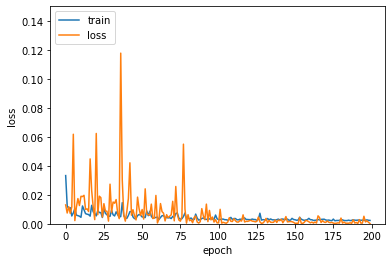

In [86]:
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [87]:
# 모델 평가하기

train_score = model.evaluate(X_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train score :', train_score)
val_score = model.evaluate(X_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validation score :', val_score)
test_score = model.evaluate(X_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test score :', test_score)

Train score : 0.00022031947446521372
Validation score : 0.0002276587183587253
Test score : 0.0002276587183587253


In [90]:
# 모델 사용하기

look_ahead = 250
xhat = X_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

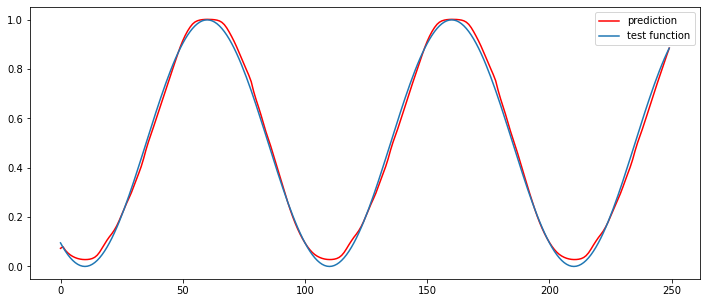

In [91]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label='test function')
plt.legend()
plt.show()

# 성능 젤 좋으나, 손실값의 변화가 많이 일어남